In [1]:
import requests
import nfl_data_py as nfl
import numpy as np
import pandas as pd
import highlight_text as htext
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import matplotlib.font_manager
from PIL import Image
from io import BytesIO

In [142]:
# add font family
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-light.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-bold.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-black.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='/home/friend/Downloads/Akzidenz-grotesk-roman.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='../fonts/Bebas_Neue/BebasNeue-Regular.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='../fonts/Bangers/Bangers-Regular.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='../fonts/Contrail_One/ContrailOne-Regular.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='../fonts/Goldman/Goldman-Regular.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='../fonts/Goldman/Goldman-Bold.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='../fonts/Permanent_Marker/PermanentMarker-Regular.ttf')
mpl_fm = matplotlib.font_manager.fontManager.addfont(path='../fonts/Righteous/Righteous-Regular.ttf')

In [259]:
# get team to logo URL datframe
team_logoURL = pd.read_csv("./data/team_logos.csv")

In [260]:
team = 'LA'
season = 2022
week = 4
cols = ['game_id','epa','season_type','season','week','drive','series','down','ydstogo','wp','ep','yardline_100','home_team','away_team','posteam','defteam','game_seconds_remaining','game_half','fixed_drive_result']#'qb_kneel','field_goal_attempt','TD_team','safety','penalty','fumble_lost','interception','fourth_down_failed']
df_pbp = nfl.import_pbp_data(years=[season], columns=cols, downcast=True, cache=False)
logoURL = team_logoURL[team_logoURL['team_abbr'] == team].team_logo_wikipedia.tolist()[0]

2022 done.
Downcasting floats.


In [261]:
conditional_team = (df_pbp['posteam'] == team)
conditional_week = (df_pbp['week'] == week)
is_down = (df_pbp['down'].notnull())
df_team_week_plays = df_pbp[conditional_team & conditional_week & is_down]
df_team_week_plays

,game_id,epa,season_type,week,drive,series,down,ydstogo,wp,ep,yardline_100,home_team,away_team,posteam,defteam,game_seconds_remaining,game_half,fixed_drive_result,season
9747,2022_04_LA_SF,0.011117,REG,4,1.0,1.0,1.0,10.0,0.433208,0.770222,75.0,SF,LA,LA,SF,3600.0,Half1,Field goal,2022
9748,2022_04_LA_SF,0.811103,REG,4,1.0,1.0,2.0,6.0,0.422482,0.781340,71.0,SF,LA,LA,SF,3570.0,Half1,Field goal,2022
9749,2022_04_LA_SF,-0.555635,REG,4,1.0,2.0,1.0,10.0,0.454899,1.592443,64.0,SF,LA,LA,SF,3538.0,Half1,Field goal,2022
9750,2022_04_LA_SF,0.748041,REG,4,1.0,2.0,2.0,9.0,0.436781,1.036808,63.0,SF,LA,LA,SF,3516.0,Half1,Field goal,2022
9751,2022_04_LA_SF,1.115087,REG,4,1.0,2.0,3.0,1.0,0.437967,1.784849,55.0,SF,LA,LA,SF,3488.0,Half1,Field goal,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9896,2022_04_LA_SF,-0.394357,REG,4,17.0,48.0,2.0,10.0,0.002684,3.446139,24.0,SF,LA,LA,SF,122.0,Half2,Turnover,2022
9898,2022_04_LA_SF,-3.530036,REG,4,17.0,48.0,3.0,10.0,0.002132,3.051782,24.0,SF,LA,LA,SF,118.0,Half2,Turnover,2022
9907,2022_04_LA_SF,0.042358,REG,4,19.0,50.0,1.0,10.0,0.000991,0.859081,58.0,SF,LA,LA,SF,45.0,Half2,End of half,2022
9908,2022_04_LA_SF,0.092623,REG,4,19.0,50.0,2.0,1.0,0.001043,0.901439,49.0,SF,LA,LA,SF,22.0,Half2,End of half,2022


In [262]:
home_team = df_team_week_plays.home_team.unique()[0]
away_team = df_team_week_plays.away_team.unique()[0]

In [263]:
srs_team_weeks_sums = df_team_week_plays.groupby(['drive']).agg({'epa':'sum','ep':'sum','posteam':'count'})
(srs_team_weeks_sums.ep/srs_team_weeks_sums.posteam).sum(axis=0)

13.576679522417598

In [264]:
df_drives_results_halfs = df_team_week_plays[['drive','fixed_drive_result','game_half']].drop_duplicates(['drive','fixed_drive_result'])
drives = df_drives_results_halfs['drive'].tolist()
results = df_drives_results_halfs['fixed_drive_result'].tolist()
game_halfs = df_drives_results_halfs['game_half'].tolist()
half_idx = game_halfs.index('Half2')
game_halfs.insert(half_idx, 'Halftime')
drives.insert(half_idx, -1)
results.insert(half_idx, '')

height_ratios=[1]*(len(drives)-1)
height_ratios.insert(half_idx,0.1)

league_epa_min =df_pbp.epa.min()
league_epa_max =df_pbp.epa.max()
game_epa_min =df_team_week_plays.epa.min()
game_epa_max =df_team_week_plays.epa.max()

In [265]:
def format_drive_result(drive_result):  
    if drive_result in ["Touchdown", "Opp touchdown"]:
        drive_result = drive_result + "!"
    return " " + drive_result.upper()
    

In [279]:
# adjust coloring of downs?
# How do I want to convey personnel, down and distance, results of drive?

# FONT FAMILY
azkidenz_text = "AkzidenzGrotesk"
bebas_text =  "Bebas Neue"
loma_text = "Loma"
bangers_text = "Bangers"
contrail_text = "Contrail One"
goldman_text = "Goldman"
pm_text = "Permanent Marker"
righteous_text = "Righteous"

# ASSIGN FONT FAMILY
title_text = bebas_text
subtitle_text = loma_text
axs_label_text = contrail_text
axs_title_text = bebas_text
touchdown_text = bangers_text
drive_result_text = contrail_text
credits_text = pm_text

# COLOR
team_color1 = team_logoURL[team_logoURL['team_abbr'] == team].team_color.tolist()[0]
team_color2 = team_logoURL[team_logoURL['team_abbr'] == team].team_color2.tolist()[0]
team_color3 = team_logoURL[team_logoURL['team_abbr'] == team].team_color3.tolist()[0]
home_team_color = team_logoURL[team_logoURL['team_abbr'] == home_team].team_color.tolist()[0]
away_team_color = team_logoURL[team_logoURL['team_abbr'] == away_team].team_color.tolist()[0]
background = "#444148"
text_color = "#F8F9F9"
filler_color = "grey"
primary_color = team_color1
drive_start_color = "lightgrey"
drive_end_color = "lightgrey"
# touchdown_color = "#CFF3F2"
color_map = "Spectral"
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

# TEXT
title = "Quicklook:  {}'s Offensive Drives in <Week {}>\n"
drive_title = "drive no.{}"
subtitle = "NFL {} season\n\t<{}> @ <{}>"
credits = "created: keegan heilman / @keeganheilman\ndata: nflreadr (https://github.com/nflverse) via nfl_data_py (https://github.com/cooperdff/nfl_data_py)"

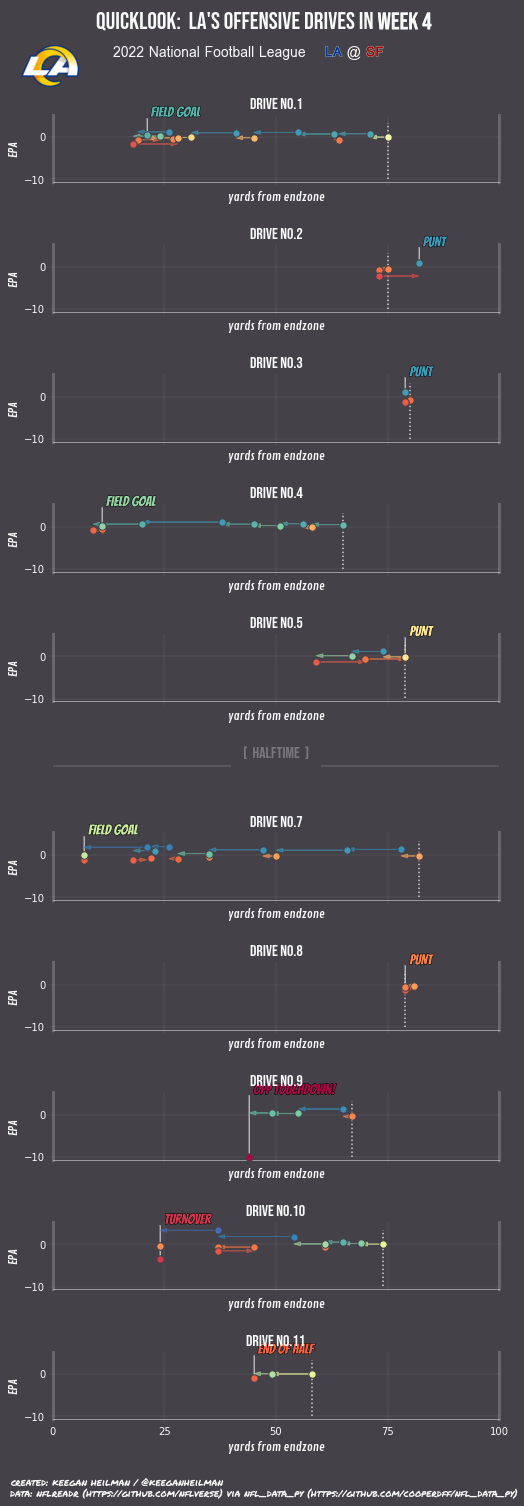

In [290]:
# plot figure, axs
fig = plt.figure(figsize=(8,24))
gs = fig.add_gridspec(len(drives), hspace=1, height_ratios=height_ratios)
axs = gs.subplots(sharex=True, sharey=True)
fig.set_facecolor(background)

cmap = matplotlib.cm.get_cmap(color_map)
norm = mpl.colors.SymLogNorm(linthresh=0.1, vmin=league_epa_min, vmax=league_epa_max)

for drive_idx, (drive, drive_result, game_half) in enumerate(zip(drives, results, game_halfs)):
    if game_half == 'Halftime':
        axs[drive_idx].patch.set_facecolor(background)
        axs[drive_idx].set_title(label='[  halftime  ]', color=text_color, fontweight="light", fontfamily=axs_title_text, fontsize=16, alpha=0.3)
        axs[drive_idx].axis("off")
        axs[drive_idx].hlines(y=[-1], xmin=0, xmax=40, colors=[drive_start_color],linestyles="solid", alpha=0.2)
        axs[drive_idx].hlines(y=[-1], xmin=60, xmax=100, colors=[drive_start_color],linestyles="solid", alpha=0.2)
    else:
        x = df_team_week_plays[df_team_week_plays.drive == drive].yardline_100.tolist()
        y = df_team_week_plays[df_team_week_plays.drive == drive].epa.tolist()
        axs[drive_idx].patch.set_facecolor(background)
        axs[drive_idx].grid(ls="-", lw=0.2, color="#838383", zorder=-10)
        axs[drive_idx].set_title(drive_title.format(drive_idx+1), color=text_color, fontweight="light", fontfamily=axs_title_text, fontsize=16)
        axs[drive_idx].set_xlim(0,100)
        axs[drive_idx].set_xlabel("yards from endzone",color=text_color,fontfamily=axs_label_text, fontsize=12)
        axs[drive_idx].set_ylabel("EPA",color=text_color,fontfamily=axs_label_text, fontsize=12)
        axs[drive_idx].tick_params(axis="both",length=4, width=0.2, color="#838383")
        axs[drive_idx].xaxis.set_major_locator(plt.MaxNLocator(4))
      
        spines = ["top", "right", "bottom", "left"]
        for s in spines:
            if s in ["top"]:
                axs[drive_idx].spines[s].set_visible(False)
            elif s in ["left", "right"]:
                axs[drive_idx].spines[s].set_color(text_color)
                axs[drive_idx].spines[s].set_linewidth(3)
                axs[drive_idx].spines[s].set_alpha(.2)
            else:
                axs[drive_idx].spines[s].set_color(text_color)
                axs[drive_idx].spines[s].set_alpha(.6)



        for point_idx, (x_val, y_val) in enumerate(zip(x,y)):
            cmap_point_color = (cmap(norm(y_val)))
            if point_idx < len(x)-1:
                if point_idx == 0:
                    axs[drive_idx].vlines(x_val, ymin=game_epa_min, ymax=game_epa_max, colors=[drive_start_color], linestyles="dotted")
                axs[drive_idx].arrow(x_val,y_val,
                                     x[point_idx+1]-x_val,0,
                                     color=(cmap(norm(y[point_idx]))),
                                     shape="full",
                                     length_includes_head=True,
                                     head_width=0.9,
                                     head_length=1.5,
                                     capstyle="butt",
                                     alpha=0.6,
                                     lw=1,
                                     zorder=5)
            # plot end of drive information
            if point_idx == len(x)-1:
                # plot vertical line at end of drive point
                end_of_drive_line = axs[drive_idx].vlines(x_val, ymin=y_val,ymax=game_epa_max+1.3,
                                                          colors=[drive_end_color],
                                                          linestyles="solid",
                                                          alpha=0.5,
                                                          zorder=-5)
                end_of_drive_line.set_path_effects([path_effects.withStroke(linewidth=0.5, foreground="white")])
                # plot end of drive result text (e.g. "TOUCHDOWN!") 
                drive_result_t= axs[drive_idx].text(x=x_val+0.3,y=game_epa_max+1.5,
                                                        s=format_drive_result(drive_result),
                                                        color=cmap_point_color,
                                                        fontfamily=touchdown_text,
                                                        fontsize=14)
                drive_result_t.set_path_effects([path_effects.withStroke(linewidth=1, foreground="black")])
            # plot play point x=epa, y=yardline_100
            axs[drive_idx].scatter(x_val,y_val, color=cmap_point_color,edgecolors=background,s=55, alpha=1,lw=1,zorder=10)

        
# plot figure title
title_t = htext.fig_text(s=title.format(team, week),
               x=0.2,y=0.94,
               highlight_textprops=[{"color":text_color, "path_effects":[path_effects.withStroke(linewidth=0.1, foreground="darkgrey")]}], 
               color=text_color,
               fontsize=24,
               fontfamily=title_text, )

# plot figure subtitle
subtitle_t = htext.fig_text(x=0.23,y=0.92,
               s=subtitle.format(season, away_team, home_team),
               highlight_textprops=[{"color":away_team_color,"fontweight":"bold", "path_effects":[path_effects.withStroke(linewidth=1, foreground="darkgrey")]},
                                    {"color":home_team_color,"fontweight":"bold", "path_effects":[path_effects.withStroke(linewidth=1, foreground="darkgrey")]}],
               fontweight="light",
               color=text_color,
               fontfamily=subtitle_text,
               fontsize=14)

# add axis and plot logo
ax2 = fig.add_axes([0.07,0.858,0.10,0.10])
ax2.axis("off")
url = logoURL
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)
             
# plot credits
fig.text(0.05, 0.08,
         s=credits,
         fontstyle="italic",
         fontweight="light",
         fontsize=10,
         fontfamily=credits_text,
         color=text_color)
    
# plt.tight_layout()
plt.show()
plt.close('all')

In [218]:



# # confirm font family is added
# from IPython.core.display import HTML
# def make_html(fontname):
#     return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

# code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

# HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [66]:
df_team_week_plays[((df_team_week_plays['down'] == 1) | (df_team_week_plays['down'] == 2))].epa
df_team_week_plays[((df_team_week_plays['down'] == 3) | (df_team_week_plays['down'] == 4))].epa

9561   -0.234484
9562    2.009459
9563    0.552300
9564   -1.220886
9565    0.821761
9584   -1.164958
9585   -0.853537
9604    0.712392
9605    1.521636
9606    0.757183
9607   -0.373587
9608    0.892704
9609    2.049282
9620   -5.820731
9630    0.204874
9632   -0.388793
9634   -0.288332
9635    0.222565
9638    0.485832
9640   -0.184415
9641   -0.211533
9644    2.278424
9645   -0.589850
9646    2.327518
9663   -0.588134
9664    1.159994
9665   -0.549108
9666   -0.807620
9680    0.396764
9681    0.369835
9682    0.844604
9683    0.125377
9684   -0.373595
9686    0.836690
9687    1.210694
9688    0.296169
9689   -0.107155
9690   -0.386179
9706    0.120748
9707    0.901739
9708   -0.538718
9709   -0.430656
9719    0.828518
9720   -0.413031
9721    0.767708
9723    1.314559
9739    0.084583
9740   -0.133540
9741    0.684956
9742   -0.107420
9743   -0.767161
Name: epa, dtype: float32

<AxesSubplot:>

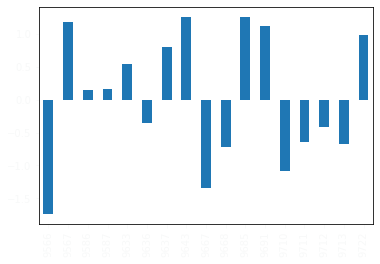